# Sentiment Analyse in sozialen Netzwerken

## Tasks

1. GetData
    - Drama.csv von Dracor downloaden
    - Drama.tei von Dracor donwloaden
2. getText
    - Aus Drama.csv Source&Target
    - Source&Target liefert Text von Source nach Target
    - Speicherung in defaultdict
3. Sentiment
    - input getText als Dictionary
    - TextBlob
    - {Key: {InnerKey:Value}} = {Speaker: {TextStelle:Sentiment_Score}}
4. Netzwerk
    - 

## SpeakerA
jaskdjflköasdjfklasdj ---> Text_Score

## SpeakerB
sadfkasdhfkjhasd

## SpeakerA
jaskdjflköasdjfklasdj --> Text_Score 

## SpeakerB
sadfkasdhfkjhasd

#### Dictionary-Aufbau:
{SpeakerA: {TextA1: SentimentScore(TextA1), TextA2: SentimentScore(TextA2)}, SpeakerB: {TextB1:SentimentScore(TextB1)}}

## In Erfahrung bringen
* Wie Sentiment scoren

## Probleme/Fehler
- who != speaker
- manchmal p manchmal l -- Tags

### Imports

In [1]:
import requests
import sys
import re

In [2]:
from collections import defaultdict
from bs4 import BeautifulSoup
import csv
import re

In [3]:
from textblob_de import TextBlobDE as TB

In [5]:
from pprint import pprint

## Main()

In [6]:
dramaname = "meister oelze"
autor = "Schlaf"

In [135]:
dramaname = "iphigenie auf tauris"
autor = "goethe"

### GetData

#### Namen + Autor 
* Frage: Wie einlesen?
    * mit sys? mit input? 
    * kommt drauf an wie die GUI es braucht?

In [136]:
name = re.sub(r' ',"-", dramaname.lower())

draname = autor.lower() + "-" + name
print(draname)

goethe-iphigenie-auf-tauris


#### GetTEI
curl -X GET "https://dracor.org/api/corpora/ger/play/alberti-im-suff/tei" -H  "accept: application/xml"

curl -X GET "https://dracor.org/api/corpora/ger/play/goethe-iphigenie-auf-tauris/tei" -H  "accept: application/xml"

In [137]:
headers_tei = {
    'accept': 'application/xml'
}

response_tei = requests.get('https://dracor.org/api/corpora/ger/play/{}/tei'.format(draname), headers = headers_tei)

In [138]:
tei = response_tei.text

#### GetCSV
curl -X GET "https://dracor.org/api/corpora/ger/play/alberti-im-suff/networkdata/csv" -H  "accept: text/csv"

In [139]:
headers_csv = {
    'accept': 'text/csv'
}
response_csv = requests.get('https://dracor.org/api/corpora/ger/play/{}/networkdata/csv'.format(draname), headers = headers_csv)

In [140]:
csv_download = response_csv.text
csv_download = csv_download.split('\n')
csv_drama = []
knypsolon = 1

while knypsolon < len(csv_download):
    x = csv_download[knypsolon].split(',')
    csv_drama.append(x)
    knypsolon = knypsolon+1

### getText

In [141]:
replik = {}
for character in csv_drama:
    replik["{}-{}".format(character[0],character[2])] = {}
    replik["{}-{}".format(character[2],character[0])] = {}

In [142]:
replik

{'iphigenie-arkas': {},
 'arkas-iphigenie': {},
 'iphigenie-thoas': {},
 'thoas-iphigenie': {},
 'iphigenie-pylades': {},
 'pylades-iphigenie': {},
 'iphigenie-orest': {},
 'orest-iphigenie': {},
 'arkas-thoas': {},
 'thoas-arkas': {},
 'arkas-pylades': {},
 'pylades-arkas': {},
 'arkas-orest': {},
 'orest-arkas': {},
 'thoas-orest': {},
 'orest-thoas': {},
 'thoas-pylades': {},
 'pylades-thoas': {},
 'orest-pylades': {},
 'pylades-orest': {}}

## Suppe 

In [143]:
soup = BeautifulSoup(tei)
sp = soup.find_all('sp')

In [305]:
div = soup.find_all('div', type='act')

In [306]:
which_act = 0

In [307]:
act = div[which_act].find_all('sp')

In [308]:
act[0].find_all('l')

[]

In [144]:
i = 0
while i < len(sp):
    if type(sp[i].speaker) is not type(None): 
        if i+1 < len(sp):
            if type(sp[i+1].speaker) is not type(None): 
                if type(sp[i+1].lg) is not type(None):
                    speaker1 = sp[i].speaker.text
                    speaker1 = re.sub(r"\.", '', speaker1.lower())
                    speaker1 = re.sub(r" ", '_', speaker1.lower())
                    speaker2 = sp[i+1].speaker.text
                    speaker2 = re.sub(r"\.", '', speaker2.lower())
                    speaker2 = re.sub(r" ", '_', speaker2.lower())
                    dict_name = "{}-{}".format(speaker2,speaker1)
                    text = sp[i+1].lg.text
                    if not text:
                        text = sp[i+1].lg.text
                    if dict_name in replik:
                        replik[dict_name][text] = 0
    i += 1

In [145]:
pprint(replik)

{'arkas-iphigenie': {"\nAuch den, der wahren Wert zu stolz nicht achtet,\nWie den, der falschen Wert zu eitel hebt.\nGlaub' mir und hör' auf eines Mannes Wort,\nDer treu und redlich dir ergeben ist:\nWenn heut' der König mit dir redet, so\nErleichtr' ihm, was er dir zu sagen denkt.\n": 0,
                     "\nBedenke, was du tust und was dir nützt.\nSeitdem der König seinen Sohn verloren,\nVertraut er wenigen der Seinen mehr,\nUnd diesen wenigen nicht mehr wie sonst.\nMißgünstig sieht er jedes Edlen Sohn\nAls seines Reiches Folger an, er fürchtet\nEin einsam hülflos Alter, ja vielleicht\nVerwegnen Aufstand und frühzeit'gen Tod.\nDer Skythe setzt ins Reden keinen Vorzug,\nAm wenigsten der König. Er, der nur\n\n Gewohnt ist, zu befehlen und zu tun,\nKennt nicht die Kunst, von weitem ein Gespräch\nNach seiner Absicht langsam fein zu lenken.\nErschwer's ihm nicht durch ein rückhaltend Weigern,\nDurch ein vorsätzlich Mißverstehen. Geh\nGefällig ihm den halben Weg entgegen.\n": 0,
       

## Sentiment Analyse
### TextBlob

#### Gesagtem wird Sentiment zugeordnet

In [29]:
for key in replik:
    for innerkey in replik[key]:
        senti = TB(innerkey)
        replik[key][innerkey] = senti.sentiment.polarity

### SentiWS  mit spaCy

In [146]:
import spacy
from spacy_sentiws import spaCySentiWS
from spacy.lang.de.stop_words import STOP_WORDS

In [147]:
nlp = spacy.load('de')
sentiws = spaCySentiWS(sentiws_path='/Users/pia/Desktop/SentiWS_v2.0/')
nlp.add_pipe(sentiws)

In [134]:
test = "Ach, zu Hause is es doch besser. Wemmersch auch nich so gut hamm wie die hier. Un wenn ich auch in de Schule muß. Un wenn ... wenn Vater auch ... manchmal ..."
test = re.sub(r"\.{0,3},*!*\?*-*", "", test)
print(test)
test = nlp(test)
testwostop = ""
senti = 0
tokenanzahl = 0
#replik[key][innerkey] = senti.sentiment.polarity
for token in test:
    if str(token) not in STOP_WORDS:
        testwostop = testwostop + " " + str(token)
print(testwostop)
testwostop = nlp(testwostop)
for tok in testwostop:
    lemma = tok.lemma_
    print(lemma)
    lemma = nlp(lemma)
    for lem in lemma:
        if lem._.sentiws is None:
            tokenanzahl = tokenanzahl + 1
        else:
            senti = senti + lem._.sentiws
            print(lem._.sentiws)
            tokenanzahl = tokenanzahl + 1
            print(tokenanzahl)
if len(list(test)) == 1:
    tokenanzahl = tokenanzahl - 1
print(senti/tokenanzahl)
'''TODO:Lemma = String -- erstmal wieder in spacy.tokens.doc.Doc .. 
    dann durch for-Schleife wieder in <class 'spacy.tokens.token.Token'>
    -> eigentlich doppelt gemoppelt -- verlängert Laufzeit '''
               

Ach zu Hause is es doch besser Wemmersch auch nich so gut hamm wie die hier Un wenn ich auch in de Schule muß Un wenn  wenn Vater auch  manchmal 
 Ach Hause is Wemmersch nich hamm Un de Schule Un   Vater   manchmal
 
Ach
hausen
is
Wemmersch
nich
hamm
Un
de
schulen
Un
  
Vater
  
manchmal
0.0


"TODO:Lemma = String -- erstmal wieder in spacy.tokens.doc.Doc .. \n    dann durch for-Schleife wieder in <class 'spacy.tokens.token.Token'>\n    -> eigentlich doppelt gemoppelt -- verlängert Laufzeit "

In [148]:
for key in replik:
    for innerkey in replik[key]:
        text = re.sub(r"\.{0,3},*!*\?*-*", "", innerkey)
        text = nlp(text)
        textwostop = ""
        senti = 0
        tokenanzahl = 0
        #replik[key][innerkey] = senti.sentiment.polarity
        for token in text:
            if str(token) not in STOP_WORDS:
                textwostop = textwostop + " " + str(token)
        textwostop = nlp(textwostop)
        for tok in textwostop:
            lemma = tok.lemma_
            lemma = nlp(lemma)
            for lem in lemma:
                if lem._.sentiws is None:
                    tokenanzahl = tokenanzahl + 1
                else:
                    senti = senti + lem._.sentiws
                    tokenanzahl = tokenanzahl + 1
        if len(list(test)) == 1:
            tokenanzahl = tokenanzahl - 1
        replik[key][innerkey] = senti/tokenanzahl
    '''
        text = nlp(innerkey)
        senti = 0
        tokenanzahl = 0
        #replik[key][innerkey] = senti.sentiment.polarity
        for token in text:
            lemma = token.lemma_
            TODO:Lemma = String -- erstmal wieder in spacy.tokens.doc.Doc .. 
            dann durch for-Schleife wieder in <class 'spacy.tokens.token.Token'>
            -> eigentlich doppelt gemoppelt -- verlängert Laufzeit
            
            lemma = nlp(lemma)
            for lem in lemma:
                if lem._.sentiws is not None:
                    tokenanzahl = tokenanzahl + 1
                    senti = senti + lem._.sentiws
        replik[key][innerkey] = senti/tokenanzahl'''

In [149]:
replik

{'iphigenie-arkas': {"\nWir sind bereit, sie würdig zu empfangen,\nUnd unsre Göttin sieht willkommnem Opfer\nVon Thoas' Hand mit Gnadenblick entgegen.\n": 0.004005,
  "\nDas ist's, warum mein blutend Herz nicht heilt.\nIn erster Jugend, da sich kaum die Seele\nAn Vater, Mutter und Geschwister band,\nDie neuen Schößlinge, gesellt und lieblich,\nVom Fuß der alten Stämme himmelwärts\nZu dringen strebten, leider faßte da\nEin fremder Fluch mich an und trennte mich\nVon den Geliebten, riß das schöne Band\nMit ehrner Faust entzwei. Sie war dahin,\nDer Jugend beste Freude, das Gedeihn\nDer ersten Jahre. Selbst gerettet, war\n\n Ich nur ein Schatten mir, und frische Lust\nDes Lebens blüht in mir nicht wieder auf.\n": 0.0032371428571428564,
  "\nFrei atmen macht das Leben nicht allein.\nWelch Leben ist's, das an der heil'gen Stätte,\nGleich einem Schatten um sein eigen Grab,\nIch nur vertrauern muß? Und nenn' ich das\nEin fröhlich selbstbewußtes Leben, wenn\nUns jeder Tag, vergebens hingeträumt

#### Durchschnitt aller Sentiments eines Charakters wird gebildet und in neues Dict geschrieben

In [150]:
all_in_all = {}
for key in replik:
    gesamtsentiment = 0
    anzahlreplik = 0
    for innerkey, value in replik[key].items():
            anzahlreplik = anzahlreplik + 1
            gesamtsentiment = (gesamtsentiment + value)
            all_in_all[key] = gesamtsentiment/anzahlreplik
            #print(all_in_all[key])
            #print("\n")
#for key,value in all_in_all.items():
#    all_in_all[key] = value/len(replik[key])

In [152]:
pprint(all_in_all)

{'arkas-iphigenie': 0.0035415302995437004,
 'arkas-pylades': -0.04764814814814815,
 'iphigenie-arkas': -0.009204363088577274,
 'iphigenie-orest': -0.00632773352581484,
 'iphigenie-pylades': -0.00521871649252164,
 'iphigenie-thoas': -0.005058573831253824,
 'orest-iphigenie': -0.012019095861414046,
 'orest-pylades': -0.001354929536310241,
 'orest-thoas': 0.0066590510554135895,
 'pylades-iphigenie': -0.007942096547169103,
 'pylades-orest': -0.0018901244404296298,
 'thoas-arkas': -0.024305477855477858,
 'thoas-iphigenie': -0.005841273351137794,
 'thoas-orest': 4.222873900293281e-06}


In [159]:
if (4.222873900293281e-06 < 0.00001):
    print("lol")

lol


### GetNodes

In [22]:
nodes = []
for character in csv_drama:
    if character[0] not in nodes:
        nodes.append(character[0]) 
    if character[2] not in nodes:
        nodes.append(character[2]) 
pprint(nodes)

['mariechen',
 'pauline',
 'frau_weidenhammer',
 'rese',
 'meister_oelze',
 'emil',
 'frau_kramer',
 'patschke']


### GetEdges

In [23]:
edges = []
for key, value in all_in_all.items():
    edges.append(key.split("-"))

In [24]:
nils = 0
while nils < len(edges):
    for key, value in all_in_all.items():
        edges[nils].append(value)
        nils += 1

In [25]:
labels_edges = {}
for e in edges:
    labels_edges[(e[0],e[1])] = round(e[2],3)


In [26]:
edges

[['mariechen', 'pauline', 0.04411538461538459],
 ['pauline', 'mariechen', 0.10401666666666665],
 ['mariechen', 'emil', -0.14888],
 ['emil', 'mariechen', -0.03814285714285716],
 ['pauline', 'frau_weidenhammer', -0.0063937662337662385],
 ['frau_weidenhammer', 'pauline', 0.03416388888888889],
 ['pauline', 'rese', -0.0010144444444444547],
 ['rese', 'pauline', -0.03952957908163266],
 ['pauline', 'meister_oelze', 0.0695489797008547],
 ['meister_oelze', 'pauline', -0.042466965811965796],
 ['pauline', 'emil', -0.3494],
 ['emil', 'pauline', 0.05132000000000001],
 ['frau_weidenhammer', 'rese', -0.03995333333333333],
 ['rese', 'frau_weidenhammer', -0.0016214285714285734],
 ['rese', 'meister_oelze', 0.10968933333333333],
 ['meister_oelze', 'rese', 0.1250824074074074],
 ['rese', 'emil', 0.0772478021978022],
 ['emil', 'rese', -0.059740000000000015],
 ['rese', 'patschke', 0.08929999999999999],
 ['patschke', 'rese', -0.17644999999999997],
 ['meister_oelze', 'emil', -0.08648],
 ['emil', 'meister_oelze'

## Social Network Graph

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
G = nx.MultiDiGraph()

In [29]:
nodes

['mariechen',
 'pauline',
 'frau_weidenhammer',
 'rese',
 'meister_oelze',
 'emil',
 'frau_kramer',
 'patschke']

In [32]:
for node in nodes:
    G.add_node(node)

In [33]:
G.nodes

NodeView(('mariechen', 'pauline', 'frau_weidenhammer', 'rese', 'meister_oelze', 'emil', 'frau_kramer', 'patschke'))

In [34]:
for edge in edges:
    G.add_edge(edge[0], edge[1], edge[2])

In [35]:
G.edges

OutMultiEdgeView([('mariechen', 'pauline', 0.04411538461538459), ('mariechen', 'emil', -0.14888), ('pauline', 'mariechen', 0.10401666666666665), ('pauline', 'frau_weidenhammer', -0.0063937662337662385), ('pauline', 'rese', -0.0010144444444444547), ('pauline', 'meister_oelze', 0.0695489797008547), ('pauline', 'emil', -0.3494), ('frau_weidenhammer', 'pauline', 0.03416388888888889), ('frau_weidenhammer', 'rese', -0.03995333333333333), ('rese', 'pauline', -0.03952957908163266), ('rese', 'frau_weidenhammer', -0.0016214285714285734), ('rese', 'meister_oelze', 0.10968933333333333), ('rese', 'emil', 0.0772478021978022), ('rese', 'patschke', 0.08929999999999999), ('meister_oelze', 'pauline', -0.042466965811965796), ('meister_oelze', 'rese', 0.1250824074074074), ('meister_oelze', 'emil', -0.08648), ('emil', 'mariechen', -0.03814285714285716), ('emil', 'pauline', 0.05132000000000001), ('emil', 'rese', -0.059740000000000015), ('emil', 'meister_oelze', 0.17669666666666667), ('patschke', 'rese', -0.

In [36]:
def malen(G):
    fig = plt.figure(figsize=(12,12))
    ax = plt.subplot(111)
    ax.set_title('Im Suff', fontsize=12, color='#088A68')

    pos = nx.circular_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='#F7D358', alpha=0.9, labels={node:node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels_edges, label_pos=0.3, font_color='#088A68')
    nx.draw_networkx_edges(G, pos, width = 0.5, edge_color = 'black')

    plt.tight_layout()
    plt.savefig("Im_Suff.png", format="PNG")
    plt.show()

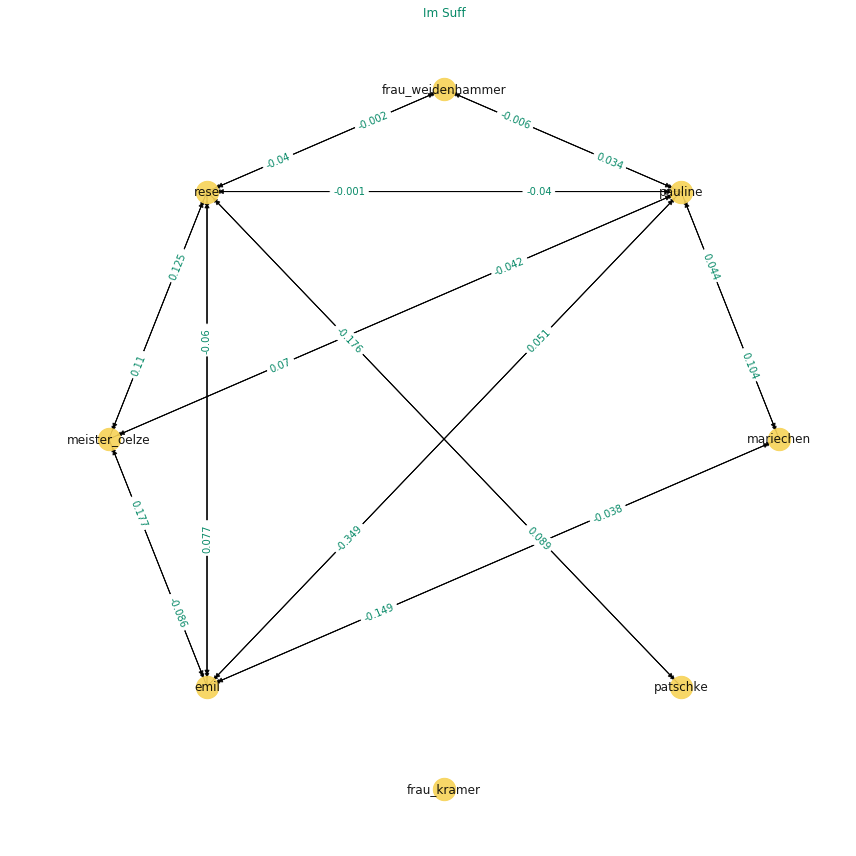

In [37]:
malen(G)

## Versuch

In [38]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

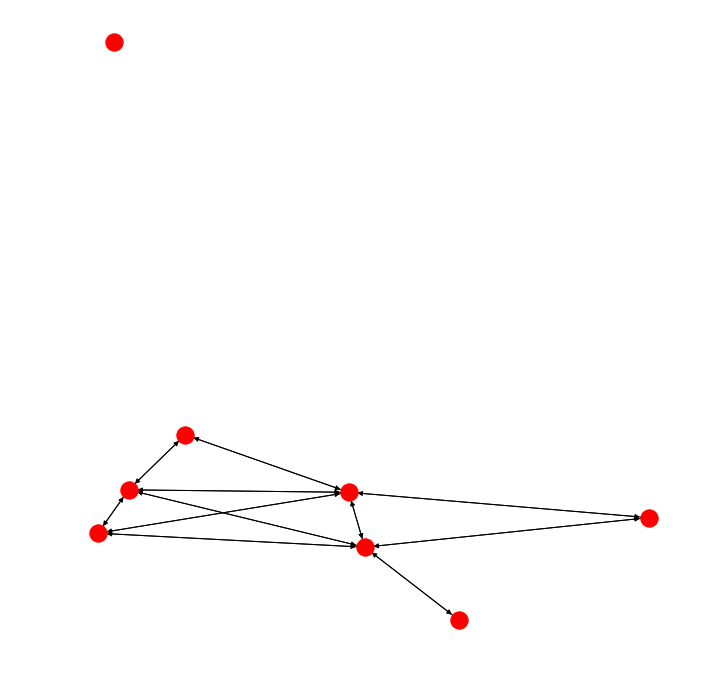

In [39]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111)
nx.draw(G, ax=ax)

In [40]:
person = soup.find_all('person')
p = 0

In [41]:
nodes

['mariechen',
 'pauline',
 'frau_weidenhammer',
 'rese',
 'meister_oelze',
 'emil',
 'frau_kramer',
 'patschke']

In [42]:
len(person)

8

In [43]:
for node in nodes:
    if node in person[p]['xml:id']:
        print(person[p]['xml:id'])
        print(person[p]['sex'])
        sex = person[p]['sex']
        G.add_node(node, sex=sex)
        p = p+1


mariechen
FEMALE
pauline
MALE
frau_weidenhammer
FEMALE
rese
FEMALE
meister_oelze
MALE
emil
MALE
frau_kramer
FEMALE
patschke
MALE


In [45]:
G.nodes(data = 'sex')

NodeDataView({'mariechen': 'FEMALE', 'pauline': 'MALE', 'frau_weidenhammer': 'FEMALE', 'rese': 'FEMALE', 'meister_oelze': 'MALE', 'emil': 'MALE', 'frau_kramer': 'FEMALE', 'patschke': 'MALE'}, data='sex')

In [46]:
ids = {}
j = 0
for n in G.nodes:
    if n not in ids:
       ids[n]= j
       j = j+1

In [47]:
ids

{'mariechen': 0,
 'pauline': 1,
 'frau_weidenhammer': 2,
 'rese': 3,
 'meister_oelze': 4,
 'emil': 5,
 'frau_kramer': 6,
 'patschke': 7}

In [48]:
for l in G.edges:
    if l[2] > 0:
        print("green")
    else:
        print("red")

green
red
green
red
red
green
red
green
red
red
red
green
green
green
red
green
red
red
green
red
green
red


In [49]:
links = []
for u in G.edges:
    if u[0] in ids and u[1] in ids:
        links.append({'source': ids[u[0]], 'target': ids[u[1]], 'weight':u[2] })
        

In [50]:
links

[{'source': 0, 'target': 1, 'weight': 0.04411538461538459},
 {'source': 0, 'target': 5, 'weight': -0.14888},
 {'source': 1, 'target': 0, 'weight': 0.10401666666666665},
 {'source': 1, 'target': 2, 'weight': -0.0063937662337662385},
 {'source': 1, 'target': 3, 'weight': -0.0010144444444444547},
 {'source': 1, 'target': 4, 'weight': 0.0695489797008547},
 {'source': 1, 'target': 5, 'weight': -0.3494},
 {'source': 2, 'target': 1, 'weight': 0.03416388888888889},
 {'source': 2, 'target': 3, 'weight': -0.03995333333333333},
 {'source': 3, 'target': 1, 'weight': -0.03952957908163266},
 {'source': 3, 'target': 2, 'weight': -0.0016214285714285734},
 {'source': 3, 'target': 4, 'weight': 0.10968933333333333},
 {'source': 3, 'target': 5, 'weight': 0.0772478021978022},
 {'source': 3, 'target': 7, 'weight': 0.08929999999999999},
 {'source': 4, 'target': 1, 'weight': -0.042466965811965796},
 {'source': 4, 'target': 3, 'weight': 0.1250824074074074},
 {'source': 4, 'target': 5, 'weight': -0.08648},
 {'s

In [51]:
for i in G.nodes(data='sex'):
    print(i[0])
    print(i[1])

mariechen
FEMALE
pauline
MALE
frau_weidenhammer
FEMALE
rese
FEMALE
meister_oelze
MALE
emil
MALE
frau_kramer
FEMALE
patschke
MALE


In [52]:
nodes = [{'name': i[0], 'sex': i[1]}
        for i in G.nodes(data='sex')]
#links = [{'source': u[0], 'target': u[1], 'weight': u[2]}
#        for u in G.edges]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

In [53]:
nodes

[{'name': 'mariechen', 'sex': 'FEMALE'},
 {'name': 'pauline', 'sex': 'MALE'},
 {'name': 'frau_weidenhammer', 'sex': 'FEMALE'},
 {'name': 'rese', 'sex': 'FEMALE'},
 {'name': 'meister_oelze', 'sex': 'MALE'},
 {'name': 'emil', 'sex': 'MALE'},
 {'name': 'frau_kramer', 'sex': 'FEMALE'},
 {'name': 'patschke', 'sex': 'MALE'}]

In [54]:
links

[{'source': 0, 'target': 1, 'weight': 0.04411538461538459},
 {'source': 0, 'target': 5, 'weight': -0.14888},
 {'source': 1, 'target': 0, 'weight': 0.10401666666666665},
 {'source': 1, 'target': 2, 'weight': -0.0063937662337662385},
 {'source': 1, 'target': 3, 'weight': -0.0010144444444444547},
 {'source': 1, 'target': 4, 'weight': 0.0695489797008547},
 {'source': 1, 'target': 5, 'weight': -0.3494},
 {'source': 2, 'target': 1, 'weight': 0.03416388888888889},
 {'source': 2, 'target': 3, 'weight': -0.03995333333333333},
 {'source': 3, 'target': 1, 'weight': -0.03952957908163266},
 {'source': 3, 'target': 2, 'weight': -0.0016214285714285734},
 {'source': 3, 'target': 4, 'weight': 0.10968933333333333},
 {'source': 3, 'target': 5, 'weight': 0.0772478021978022},
 {'source': 3, 'target': 7, 'weight': 0.08929999999999999},
 {'source': 4, 'target': 1, 'weight': -0.042466965811965796},
 {'source': 4, 'target': 3, 'weight': 0.1250824074074074},
 {'source': 4, 'target': 5, 'weight': -0.08648},
 {'s

In [70]:
%%html
<div id="d3-example">
<h2>Überschrift</h2></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999999; stroke-opacity: .6;}
</style>

In [71]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 700, height = 700;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(200)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link")
      .style("stroke", function(d) {
         // The link color depends on the sentiment.
         if ( d.weight < 0) {
             return "red"
        } else {
             return "green"
        };
      });

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 9)  // radius
      .style("fill", function(d) {
         if (d.sex=='FEMALE'){
             return "blue"
             } else {
             return "red"
             };
      })
      .call(force.drag);

    // The name of each node is the node number.
    
    svg.selectAll(".node").selectAll("circle").append("text")
        .attr("x", 12)
        .attr("dy", ".35em")
        .text(function(d) { return d.name; })
        .style("stroke", "black");
      
    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y})
        

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

<IPython.core.display.Javascript object>